<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/wolvesAndCows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
import pandas as pd

In [0]:
def plot_results_with_hyperplane(clf, clf_name, df, plt_nmbr):
 x_min, x_max = df.x.min() - .5, df.x.max() + .5
 y_min, y_max = df.y.min() - .5, df.y.max() + .5

 # step between points. i.e. [0, 0.02, 0.04, ...]
 step = .02
 # to plot the boundary, we're going to create a matrix of every possible point
 # then label each point as a wolf or cow using our classifier
 xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 # this gets our predictions back into a matrix
 Z = Z.reshape(xx.shape)

 # create a subplot (we're going to have more than 1 plot on a given image)
 pl.subplot(2, 2, plt_nmbr)
 # plot the boundaries
 pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

 # plot the wolves and cows
 for animal in df.animal.unique():
  pl.scatter(df[df.animal==animal].x,
  df[df.animal==animal].y,
  marker=animal,
  label="cows" if animal=="x" else "wolves",
  color='black')
 pl.title(clf_name)
 pl.legend(loc="best")

In [0]:
data = open("cows_and_wolves.txt").read()
data = [row.split('\t') for row in data.strip().split('\n')]

In [0]:
animals = []
for y, row in enumerate(data):
 for x, item in enumerate(row):
  # x's are cows, o's are wolves
  if item in ['o', 'x']:
    animals.append([x, y, item])

In [0]:
# Data driven farmer goes to the Rodeo

df = pd.DataFrame(animals, columns=["x", "y", "animal"])
df['animal_type'] = df.animal.apply(lambda x: 0 if x=="x" else 1)

# train using the x and y position coordiantes
train_cols = ["x", "y"]

clfs = {
 "SVM": svm.SVC(),
 "Logistic" : linear_model.LogisticRegression(),
 "Decision Tree": tree.DecisionTreeClassifier(),
}

plt_nmbr = 1


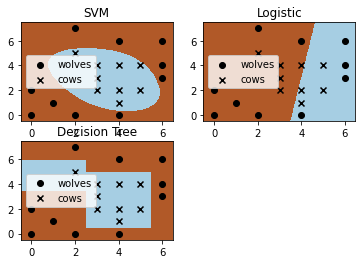

In [31]:
for clf_name, clf in clfs.items():
 clf.fit(df[train_cols], df.animal_type)
 plot_results_with_hyperplane(clf, clf_name, df, plt_nmbr)
 plt_nmbr += 1
pl.show()